In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.shape

(76014, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [7]:
df.nunique()


mid               617
date              442
venue              35
batting_team       14
bowling_team       14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

## Data Cleaning

In [8]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
#Consistent Teams
main_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']


In [10]:
df=df[df.batting_team.isin(main_teams) & df.bowling_team.isin(main_teams)]

In [11]:
df.shape

(53811, 15)

In [12]:
#removing irrelevant columns
df.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

In [13]:
irrelevent_columns=['mid', 'date', 'venue', 'batsman',
       'bowler','striker', 'non-striker']

In [14]:
df=df.drop(irrelevent_columns,axis=1)

In [15]:
df.shape

(53811, 8)

In [16]:
df.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [17]:
df.isnull().sum()

batting_team      0
bowling_team      0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

In [18]:
#Removing Initial 5 overs i.e PowerPlay overs
df=df[df.overs > 5.0]

In [19]:
df.shape

(40088, 8)

## Checking Correlation

<AxesSubplot:>

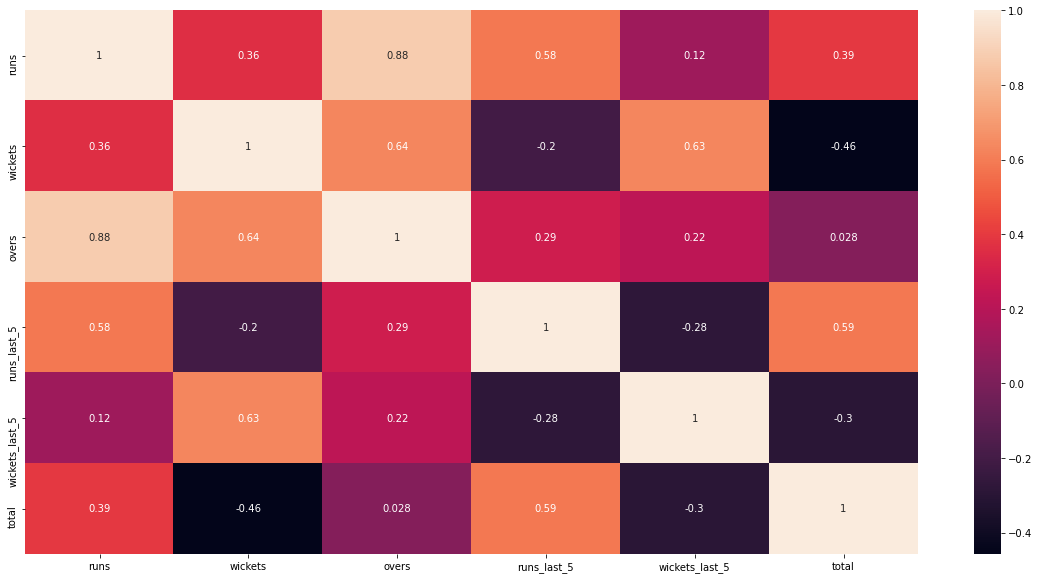

In [20]:
plt.figure(figsize=(20,10))
sn.heatmap(data=df.corr(),annot=True)

In [21]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [22]:
batting=df.batting_team
batting.head()

32    Kolkata Knight Riders
33    Kolkata Knight Riders
34    Kolkata Knight Riders
35    Kolkata Knight Riders
36    Kolkata Knight Riders
Name: batting_team, dtype: object

In [23]:
batting= pd.get_dummies(batting)


In [24]:
batting

,Chennai Super Kings,Delhi Daredevils,Kings XI Punjab,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
32,0,0,0,1,0,0,0,0
33,0,0,0,1,0,0,0,0
34,0,0,0,1,0,0,0,0
35,0,0,0,1,0,0,0,0
36,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
75884,0,0,0,1,0,0,0,0
75885,0,0,0,1,0,0,0,0
75886,0,0,0,1,0,0,0,0
75887,0,0,0,1,0,0,0,0


In [25]:
bowling=df.bowling_team

In [27]:
bowling=pd.get_dummies(bowling)
bowling

,Chennai Super Kings,Delhi Daredevils,Kings XI Punjab,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
32,0,0,0,0,0,0,1,0
33,0,0,0,0,0,0,1,0
34,0,0,0,0,0,0,1,0
35,0,0,0,0,0,0,1,0
36,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
75884,0,0,0,0,1,0,0,0
75885,0,0,0,0,1,0,0,0
75886,0,0,0,0,1,0,0,0
75887,0,0,0,0,1,0,0,0


In [30]:
final_data=pd.concat([batting,bowling,df],axis=1)

In [31]:
final_data.columns

Index(['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad', 'batting_team',
       'bowling_team', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total'],
      dtype='object')

In [32]:
final_data.drop(['batting_team',
       'bowling_team'], axis=1,inplace=True)

In [33]:
final_data.head()

,Chennai Super Kings,Delhi Daredevils,Kings XI Punjab,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad,Chennai Super Kings,Delhi Daredevils,...,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
35,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
36,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222


## Model Building

In [36]:
x=final_data.drop(['total'],axis=1)
y=final_data.total

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=10)

In [43]:
# Linear Models   
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr=LinearRegression()
la=Lasso()
ri=Ridge()


In [44]:
#Linear Regression
lr.fit(X_train,y_train)

LinearRegression()

In [76]:
lr_s=lr.score(X_test,y_test)
lr_s

0.6659258970211929

In [46]:
from sklearn.metrics import mean_absolute_error as mae , mean_squared_error as mse

In [49]:
print("MAE : {}".format(mae(y_test,lr.predict(X_test))))
print("MSE : {}".format(mse(y_test,lr.predict(X_test))))
print("RMSE : {}".format(np.sqrt(mse(y_test,lr.predict(X_test)))))


MAE : 13.143420593210937
MSE : 305.292532365551
RMSE : 17.47262236659257


In [78]:
#Lasso
la.fit(X_train,y_train)


Lasso()

In [79]:
la_s=lr.score(X_test,y_test)
la_s

0.6659258970211929

In [52]:
print("MAE : {}".format(mae(y_test,la.predict(X_test))))
print("MSE : {}".format(mse(y_test,la.predict(X_test))))
print("RMSE : {}".format(np.sqrt(mse(y_test,la.predict(X_test)))))

MAE : 13.173154179264955
MSE : 315.0059626268523
RMSE : 17.74840732648573


In [53]:
#Ridge
ri.fit(X_train,y_train)

Ridge()

In [80]:
ri_s=ri.score(X_test,y_test)
ri_s

0.6659262071280682

In [55]:
print("MAE : {}".format(mae(y_test,ri.predict(X_test))))
print("MSE : {}".format(mse(y_test,ri.predict(X_test))))
print("RMSE : {}".format(np.sqrt(mse(y_test,ri.predict(X_test)))))

MAE : 13.143358254569712
MSE : 305.2922489753917
RMSE : 17.472614257042125


In [56]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [57]:
dt=DecisionTreeRegressor()

In [58]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [81]:
dt_s=dt.score(X_test,y_test)
dt_s

0.8597270454090526

In [60]:
print("MAE : {}".format(mae(y_test,dt.predict(X_test))))
print("MSE : {}".format(mse(y_test,dt.predict(X_test))))
print("RMSE : {}".format(np.sqrt(mse(y_test,dt.predict(X_test)))))

MAE : 3.960526315789474
MSE : 128.1879832876029
RMSE : 11.3220132170742


In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf=RandomForestRegressor()

In [66]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [82]:
rf_s=rf.score(X_test,y_test)
rf_s

0.9340309509259566

In [68]:
print("MAE : {}".format(mae(y_test,rf.predict(X_test))))
print("MSE : {}".format(mse(y_test,rf.predict(X_test))))
print("RMSE : {}".format(np.sqrt(mse(y_test,rf.predict(X_test)))))

MAE : 4.4839544536697185
MSE : 60.28560091902615
RMSE : 7.764380266256036


In [69]:
from sklearn.svm import SVR

In [70]:
sv=SVR()

In [71]:
sv.fit(X_train,y_train)

SVR()

In [83]:
sv_s=sv.score(X_test,y_test)
sv_s

0.5833108233722601

In [73]:
print("MAE : {}".format(mae(y_test,sv.predict(X_test))))
print("MSE : {}".format(mse(y_test,sv.predict(X_test))))
print("RMSE : {}".format(np.sqrt(mse(y_test,sv.predict(X_test)))))

MAE : 14.759245585890275
MSE : 380.79004869787565
RMSE : 19.513842489317057


In [86]:
Models=['Linear Reg', 'Lasso','Ridge', 'Decision Tree', 'Random Forest','SVM']
Accuracy=[lr_s,ri_s,ri_s,dt_s,rf_s,sv_s]

E:\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

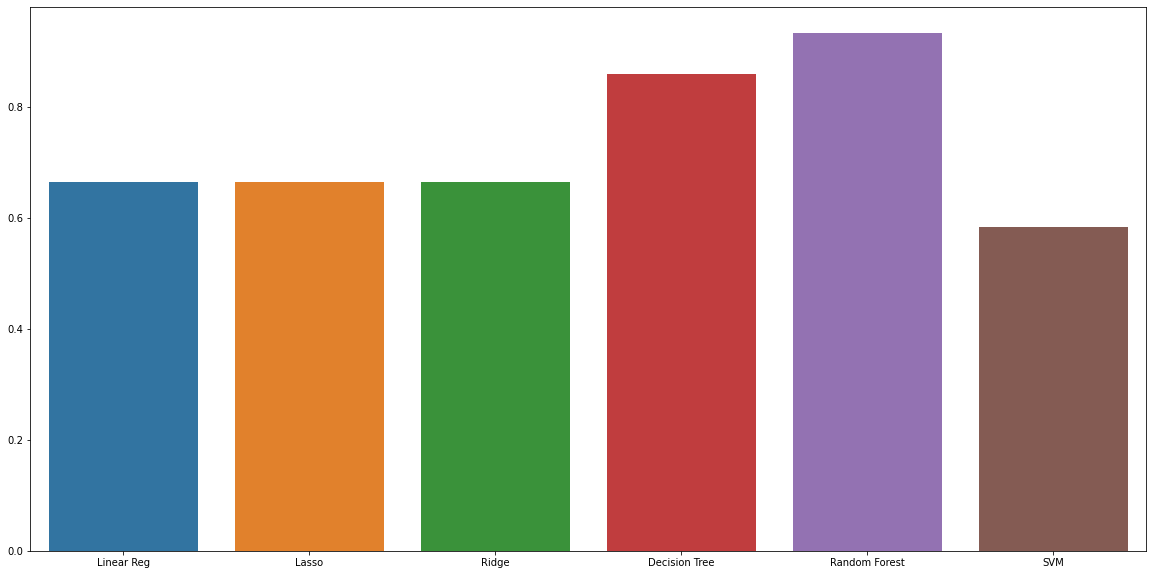

In [88]:
plt.figure(figsize=(20,10))
sn.barplot(Models,Accuracy)

### Random Forest is the Best Model